In [4]:
import datetime as dt 
import pandas as pd 
from pandas_datareader import data as pdr



# create start and end dates  

In [85]:
end = dt.datetime.now()
start = end - dt.timedelta(days=5000)
start,end

(datetime.datetime(2009, 5, 6, 2, 38, 26, 549897),
 datetime.datetime(2023, 1, 13, 2, 38, 26, 549897))

# select stocks, I'll use spy,qqq 

In [71]:
stocklist = (['SPY', 'QQQ',])
stocklist



['SPY', 'QQQ']

In [72]:
import yfinance as yf

yf.pdr_override()
data = pdr.get_data_yahoo(stocklist, start, end)
data.head()

    

[*********************100%***********************]  2 of 2 completed


Adj Close                 Close                  High             \
                  QQQ        SPY        QQQ        SPY        QQQ        SPY   
Date                                                                           
2009-05-06  30.872419  70.791298  35.029999  92.139999  35.340000  92.199997   
2009-05-07  30.149740  69.807884  34.209999  90.860001  35.270000  93.150002   
2009-05-08  30.167376  71.436653  34.230000  92.980003  34.740002  93.220001   
2009-05-11  30.273113  70.099831  34.349998  91.239998  34.720001  92.110001   
2009-05-12  29.902971  69.892357  33.930000  90.970001  34.480000  91.830002   

                  Low                  Open                Volume             
                  QQQ        SPY        QQQ        SPY        QQQ        SPY  
Date                                                                          
2009-05-06  34.459999  90.610001  35.290001  91.680000  178840500  291941000  
2009-05-07  33.880001  90.279999  35.270000  93.010002  216484700  317728000  
2009-05-08  33.880001  91.440002  34.470001  92.029999  183507300  299081700  
2009-05-11  33.680000  91.040001  33.790001  91.699997  142775900  247923600  
2009-05-12  33.520000  89.849998  34.419998  91.629997  147842200  282431300

In [73]:
data.index


DatetimeIndex(['2009-05-06', '2009-05-07', '2009-05-08', '2009-05-11',
               '2009-05-12', '2009-05-13', '2009-05-14', '2009-05-15',
               '2009-05-18', '2009-05-19',
               ...
               '2022-12-29', '2022-12-30', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-09', '2023-01-10',
               '2023-01-11', '2023-01-12'],
              dtype='datetime64[ns]', name='Date', length=3447, freq=None)

In [74]:
data.columns

MultiIndex([('Adj Close', 'QQQ'),
            ('Adj Close', 'SPY'),
            (    'Close', 'QQQ'),
            (    'Close', 'SPY'),
            (     'High', 'QQQ'),
            (     'High', 'SPY'),
            (      'Low', 'QQQ'),
            (      'Low', 'SPY'),
            (     'Open', 'QQQ'),
            (     'Open', 'SPY'),
            (   'Volume', 'QQQ'),
            (   'Volume', 'SPY')],
           )

## Get access to attributes 

In [76]:
Close = data.Close 
Close.head()

,QQQ,SPY
Date,,
2009-05-06,35.029999,92.139999
2009-05-07,34.209999,90.860001
2009-05-08,34.230000,92.980003
2009-05-11,34.349998,91.239998
2009-05-12,33.930000,90.970001


In [78]:
# this set method generates descriptive statistics such as min and max 

Close.describe()

,QQQ,SPY
count,3447.000000,3447.000000
mean,146.335524,233.586200
std,97.261931,100.754198
min,33.020000,87.959999
25%,66.774998,141.680000
50%,110.449997,209.979996
75%,188.360001,290.705002
max,403.989990,477.709991


In [83]:
Close.describe(percentiles=[0.1,0.5,0.9])

,QQQ,SPY
count,3447.000000,3447.000000
mean,146.335524,233.586200
std,97.261931,100.754198
min,33.020000,87.959999
10%,49.381999,116.520000
50%,110.449997,209.979996
90%,313.056006,395.938007
max,403.989990,477.709991


In [87]:
Close[Close.index > end - dt.timedelta(days=100)].describe(percentiles = [ 0.1,0.5, 0.9 ])

# subsect this data into the past 100 days 

,QQQ,SPY
count,68.000000,68.000000
mean,275.642353,385.226764
std,9.391227,12.882483
min,260.100006,356.559998
10%,263.501993,366.565005
50%,275.264999,384.720001
90%,287.736008,399.682996
max,293.720001,407.679993


# import plotly for an interactive graph


In [110]:
import plotly.offline as pyo 
pyo.init_notebook_mode(connected=True)

pd.options.plotting.backend = 'plotly'

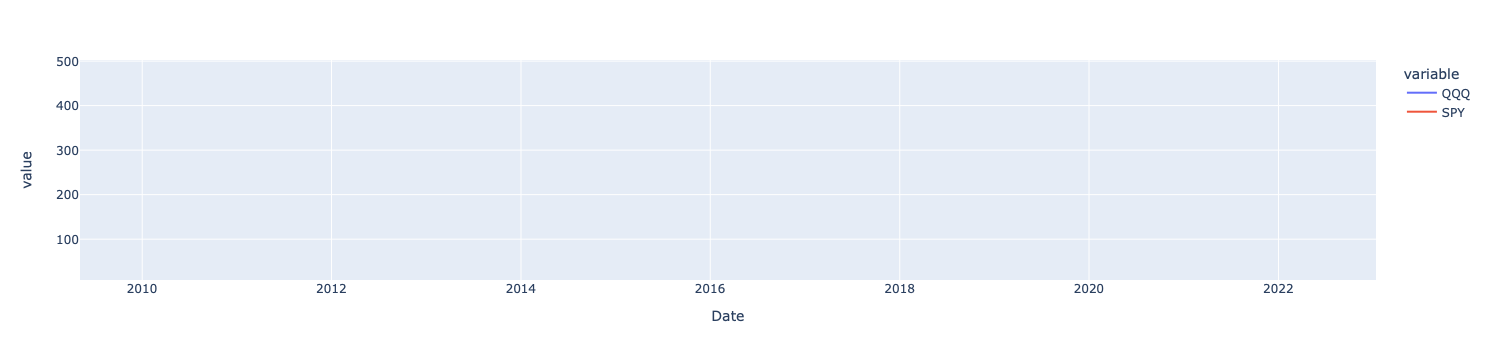

In [111]:
Close.plot()